The dataset is taken from [here](https://www.kaggle.com/darkknight91/microsoft-stock-price-daily-19982018)

In [0]:
# importing libraries
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn import preprocessing      # for normalizing data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [0]:
# Read the data
data = pd.read_csv("Microsoft Stock Exchange.csv")

### Analysis of Stock Information


In [0]:
# Let's see how our data looks like
data.head(10)

There are multiple columns in our dataset. Let's what each column means

*   The date - "Timestamp"
*   The opening price of the stock - "Open"
*   The high price of that day - "High"
*   The low price of that day - "Low"
*   The closing price of the stock  - "Close"
*   The number of stocks traded during that day - "Volume"

When we look at the above table, some dates are missing. It is because the market is closed on weekends and public holidays. 

The profit or loss calculation is determined by the closing price of a stock for the day. So we will consider the closing price as the target variable. 














In [0]:
# descriptive summary stats for Microsoft stock
data.describe()

,open,high,low,close,volume
count,5284.000000,5284.000000,5284.000000,5284.000000,5.284000e+03
mean,48.978040,49.581173,48.375030,48.990096,4.753600e+07
std,29.385947,29.837548,28.907801,29.404061,2.883750e+07
min,15.200000,15.620000,14.870000,15.150000,3.458100e+06
25%,27.060000,27.290000,26.867500,27.089875,2.798192e+07
50%,34.720000,35.020000,34.375000,34.727500,4.279235e+07
75%,63.992500,64.702500,63.202500,64.052500,6.007778e+07
max,178.940000,180.380000,175.750000,179.940000,5.910522e+08


In [0]:
# Shape of our data
data.shape

(5284, 6)

In [0]:
# General Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5284 entries, 0 to 5283
Data columns (total 6 columns):
timestamp    5284 non-null object
open         5284 non-null float64
high         5284 non-null float64
low          5284 non-null float64
close        5284 non-null float64
volume       5284 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 247.8+ KB


In [0]:
# set index as date

data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.set_index('timestamp')

data.head()

,open,high,low,close,volume
timestamp,,,,,
2019-01-02,99.55,101.75,98.94,101.12,35329345
2018-12-31,101.29,102.40,100.44,101.57,33173765
2018-12-28,102.09,102.41,99.52,100.39,38169312
2018-12-27,99.30,101.19,96.40,101.18,49498509
2018-12-26,95.14,100.69,93.96,100.56,51634793


Now that we've seen the dataframe, let’s plot the volume and closing price to understand how it’s shaping up in our data:

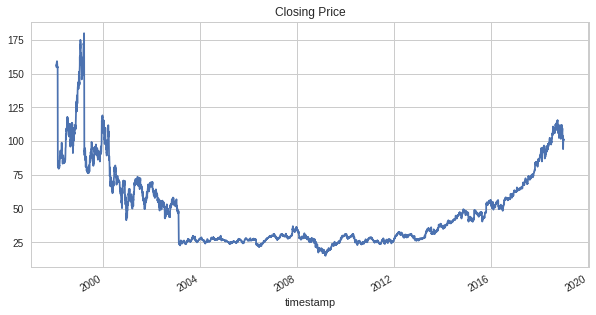

In [0]:
# Let's see a historical view of the closing price
data['close'].plot(figsize=(10, 5), title='Closing Price')

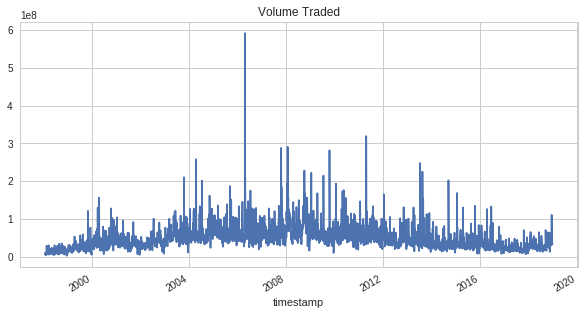

In [0]:
# Let's plot the total volume of stock being traded over the past year
data['volume'].plot(figsize=(10,5), title='Volume Traded')

Now that we've seen the visualizations for Microsoft stock. Let's go ahead and calculate the **moving average** for the stock. 

**Moving Average** (MA): It is used to identify trading opportunities. It is calculated by taking the mean or average of the past data points of the prices. It is called a moving average, as opposed to just an average because the data set is continuously “moving”: the oldest data points are dropped from the data set to account for the new data as they become available.

For more info on moving averages, use [this](https://www.investopedia.com/terms/m/movingaverage.asp) link.


In [0]:
# Pandas has a built-in rolling mean function

MA_day = [10, 20, 50, 100]

for ma in MA_day:
  attributes = 'MA for %s days' %(str(ma))
  data[attributes] = pd.rolling_mean(data['close'], ma)

Let's plot all the Moving Averages for Microsoft stock

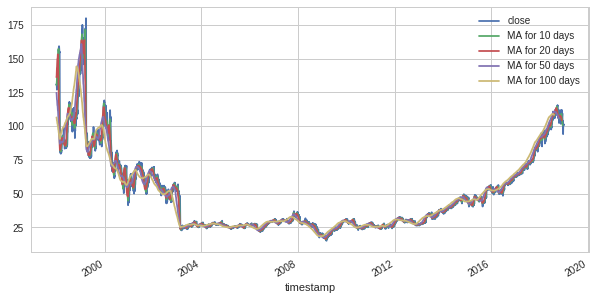

In [0]:
data[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(subplots=False, figsize=(10, 5))

Depending on the type of investor or trader (high risk vs. low risk, short-term vs. long-term trading), you can adjust your moving ‘time’ average (10 days, 20 days, 50 days, 200 days, 1 year, 5 years, etc).

Now, let's go ahead and dive a little deeper. We will take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the stock.

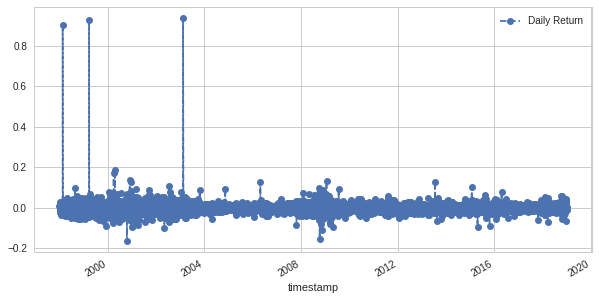

In [0]:
# We will use pct_change function to find the percent change for each day
data['Daily Return'] = data['close'].pct_change()

# Plot daily return percentage
data['Daily Return'].plot(figsize=(10, 5), legend=True, linestyle='--', marker='o')

Let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

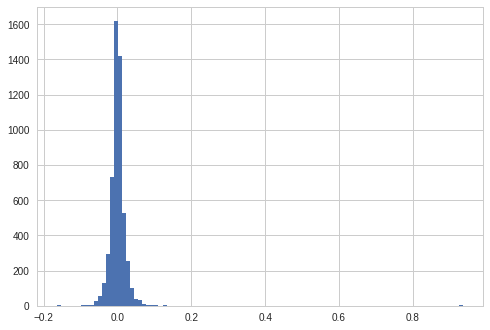

In [0]:
# Plot histogram
data['Daily Return'].hist(bins=100)

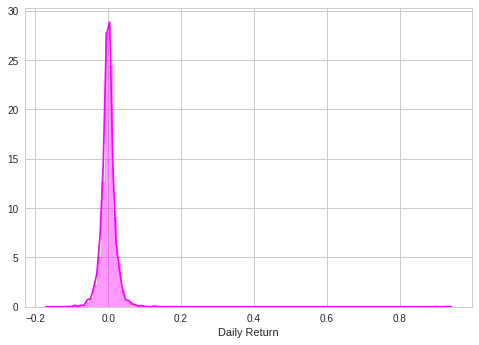

In [0]:
# NaN values can't be read by seaborn, that's why we use dropna()
sns.distplot(data['Daily Return'].dropna(), bins=100, color='magenta')

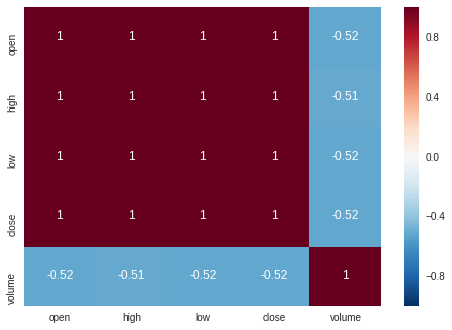

In [0]:
# Plot correlation using heatmap
sns.heatmap(data.corr(),annot=True)

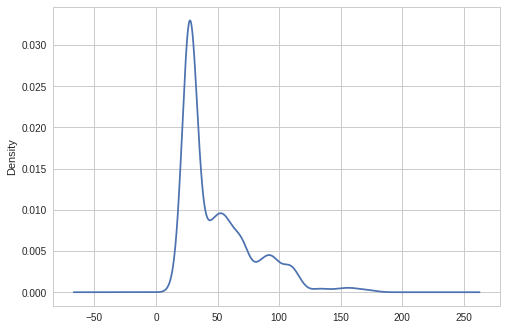

In [0]:
data['high'].plot('kde')

### Linear Regression

Linear regression is the simplest and most widely used statistical technique for predictive modeling.
The linear regression model returns an equation that determines the relationship between the independent variables (x) and the dependent variable (Y).

Linear regression consists of finding the best-fitting straight line through the points. The best-fitting line is called a regression line. 
The formula for a regression line is:

$Y = a + bx$

Where:

* Y = the predicted value or dependent variable

* b = the slope of the line

* x = the coefficient or independent variable

* a = the y-intercept



In [0]:
# Creating new column
num = 20 # forcasting 20 days ahead
data['AdjClose'] = data['close'].shift(-num)    #forecasting close column

data.shape

(5284, 6)

In [0]:
Data = data.drop(['AdjClose'], axis=1)
X = Data.values
X = preprocessing.scale(X)         # processing feature array
X = X[:-num]

data.dropna(inplace=True)          # dropping na values
Target = data.AdjClose
y = Target.values

print(np.shape(X), np.shape(y))

(5264, 5) (5264,)


In [0]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Evaluation Metrics: r2_score ($r^2$ or $R^2$)**

**R-Squared (Coefficient Of Determination) Regression Score**

$R^2$ is a statistic that will give some information about the goodness of fit of a model. In regression, the $R^2$ coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An $R^2$ of 1 indicates that the regression predictions perfectly fit the data.

Values of $R^2$ outside the range 0 to 1 can occur when the model fits the data worse than a horizontal hyperplane.

**Compute the R-Squared (Coefficient of Determination) Regression Score**

**Usage**

r2_Score(y_pred, y_true)

**Arguments**

* y_pred - Estimated target values vector

* y_true - Ground truth (correct) target values vector

In [0]:
#initializing linear regression model
lr = LinearRegression()

# training the linear regression model
LR = lr.fit(X_train, y_train)


Predi = LR.predict(X_test)
print(r2_score(y_test, Predi))

0.9263690606374524


The value of $R^2$ shows that are model accounts for nearly 93% of the differences between the actual stock prices and the predicted prices.